In [7]:
def calculate_decision(data):
    # 初始化结果列表
    results = []

    # 遍历每个场景数据
    for index, scenario in enumerate(data, 1):
        defect_rate_p1, purchase_cost_p1, test_cost_p1, defect_rate_p2, purchase_cost_p2, test_cost_p2, defect_rate_prod, assembly_cost, test_cost_prod, market_price, exchange_loss, disassembly_cost = scenario

        min_cost = float('inf')
        best_decision = None
        
        # 决策组合
        for test_p1 in [True, False]:
            for test_p2 in [True, False]:
                for test_prod in [True, False]:
                    # 计算成本和收益
                    cost = purchase_cost_p1 + purchase_cost_p2 + assembly_cost
                    revenue = market_price

                    # 检测零配件1
                    if test_p1:
                        cost += test_cost_p1
                        if defect_rate_p1 > 0 and not test_prod:
                            # 如果零件1缺陷且产品不检测，则需拆解处理
                            cost += disassembly_cost + exchange_loss
                    # 检测零配件2
                    if test_p2:
                        cost += test_cost_p2
                        if defect_rate_p2 > 0 and not test_prod:
                            # 如果零件2缺陷且产品不检测，则需拆解处理
                            cost += disassembly_cost + exchange_loss
                    
                    # 检测成品
                    if test_prod:
                        cost += test_cost_prod
                        if defect_rate_prod > 0:
                            cost += defect_rate_prod * (disassembly_cost + exchange_loss)
                            revenue -= defect_rate_prod * exchange_loss
                    else:
                        # 如果不检测成品，发现缺陷后在市场中处理
                        cost += defect_rate_prod * (disassembly_cost + exchange_loss)
                        revenue -= defect_rate_prod * exchange_loss

                    # 计算净成本
                    net_cost = cost - revenue

                    # 更新最优决策
                    if net_cost < min_cost:
                        min_cost = net_cost
                        best_decision = (test_p1, test_p2, test_prod, cost, revenue)

        # 添加最佳决策结果
        results.append(best_decision)
        print(f"情况 {index}: 零配件 1 检测: {best_decision[0]}, 零配件 2 检测: {best_decision[1]}, 成品检测: {best_decision[2]}, 总成本: {best_decision[3]}, 总收入: {best_decision[4]}")
    return results


# 数据
data = [
    (0.1, 4, 2, 0.1, 18, 3, 0.1, 6, 3, 56, 6, 5),
    (0.2, 4, 2, 0.2, 18, 3, 0.2, 6, 3, 56, 6, 5),
    (0.1, 4, 2, 0.1, 18, 3, 0.1, 6, 3, 56, 30, 5),
    (0.2, 4, 1, 0.2, 18, 1, 0.2, 6, 2, 56, 30, 5),
    (0.1, 4, 8, 0.2, 18, 1, 0.1, 6, 2, 56, 10, 5),
    (0.05, 4, 2, 0.05, 18, 3, 0.05, 6, 3, 56, 10, 40)
]

results = calculate_decision(data)


情况 1: 零配件 1 检测: False, 零配件 2 检测: False, 成品检测: False, 总成本: 29.1, 总收入: 55.4
情况 2: 零配件 1 检测: False, 零配件 2 检测: False, 成品检测: False, 总成本: 30.2, 总收入: 54.8
情况 3: 零配件 1 检测: False, 零配件 2 检测: False, 成品检测: False, 总成本: 31.5, 总收入: 53.0
情况 4: 零配件 1 检测: False, 零配件 2 检测: False, 成品检测: False, 总成本: 35.0, 总收入: 50.0
情况 5: 零配件 1 检测: False, 零配件 2 检测: False, 成品检测: False, 总成本: 29.5, 总收入: 55.0
情况 6: 零配件 1 检测: False, 零配件 2 检测: False, 成品检测: False, 总成本: 30.5, 总收入: 55.5


In [5]:
import matplotlib

# 设置matplotlib以支持中文字体显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
matplotlib.rcParams['axes.unicode_minus'] = False    # 解决保存图像是负号'-'显示为方块的问题


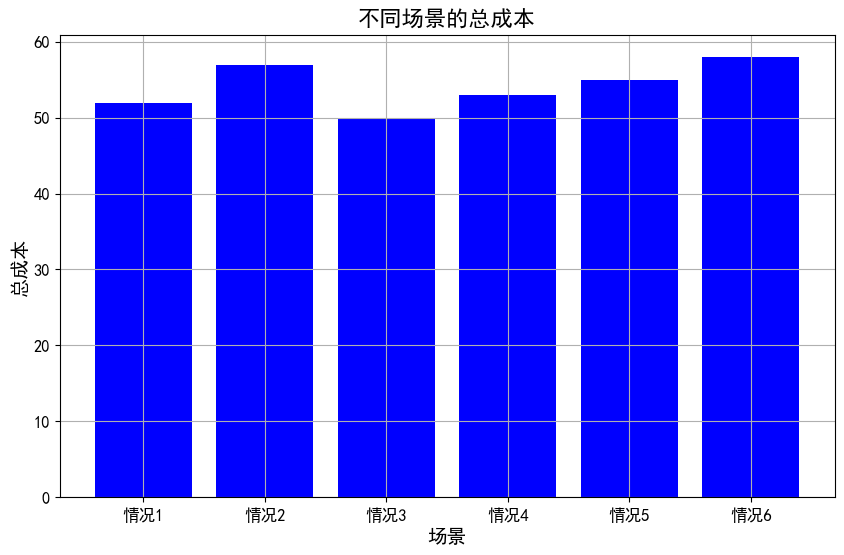

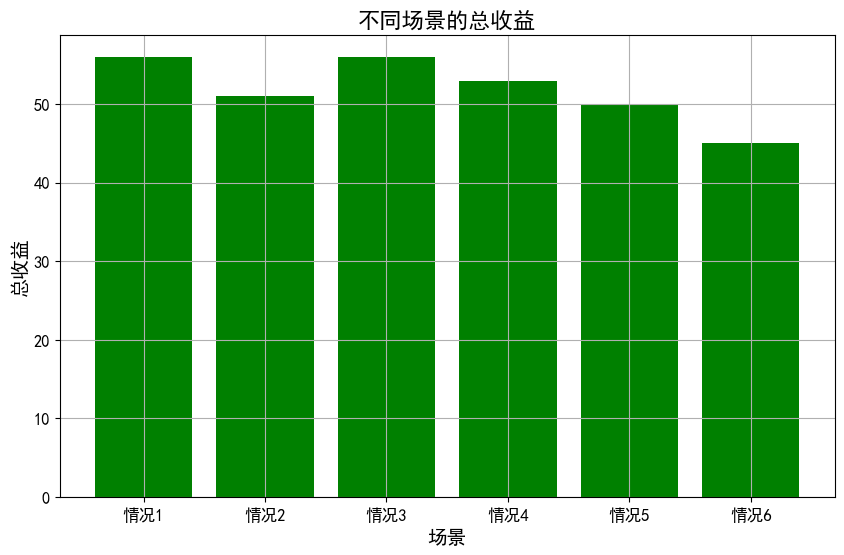

In [6]:
import matplotlib.pyplot as plt
import numpy as np


# 场景名称
scenarios = ['情况1', '情况2', '情况3', '情况4', '情况5', '情况6']

# 数据分离
costs = [result[3] for result in results]
revenues = [result[4] for result in results]

# 绘制成本图表
plt.figure(figsize=(10, 6))
plt.bar(scenarios, costs, color='blue')
plt.xlabel('场景', fontsize=14)
plt.ylabel('总成本', fontsize=14)
plt.title('不同场景的总成本', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

# 绘制收益图表
plt.figure(figsize=(10, 6))
plt.bar(scenarios, revenues, color='green')
plt.xlabel('场景', fontsize=14)
plt.ylabel('总收益', fontsize=14)
plt.title('不同场景的总收益', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()
